## Individuaul Project Proposal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
df_time = pd.read_csv('df_time.csv')
df_time.set_index("Start Time",drop=False,inplace=True)
df_time['Start Time'] = pd.to_datetime(df_time['Start Time'],errors='coerce')
df_time['DayofWeek'] = df_time['Start Time'].dt.weekday.astype('category')

In [3]:
df_time['Duration_dt'].describe()

count    2867.000000
mean       15.366236
std         4.634945
min         1.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        51.000000
Name: Duration_dt, dtype: float64

Unnamed: 0             int64
Vehicle  ID           object
Lift ID              float64
Vessel(s)             object
ETA Bridge            object
Direction             object
Email Sent            object
Advanced Notice       object
2 Hours Notice?       object
Start Time            object
End Time              object
Duration              object
Direction.1           object
Vessel(s).1           object
Predict Error         object
Notice Time           object
datetime              object
temp                 float64
timehour              object
Predicted (ft)       float64
Verified (ft)        float64
Tug                    int64
Barge                  int64
Tanker                 int64
Total Vessel           int64
Day                    int64
Month                  int64
Year                   int64
Duration_datetime     object
Duration_dt          float64
dtype: object

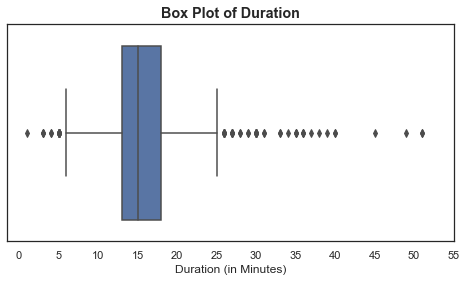

In [4]:
sns.set(rc={"figure.figsize":(8, 4)})
sns.set_style("white")
box = sns.boxplot(x=df_time['Duration_dt'])
box.set_xticks(list(range(0,60,5)))
box.set_title("Box Plot of Duration", fontdict={'fontsize':'large','fontweight':'bold'})
box.set_xlabel('Duration (in Minutes)')
plt.show()

In [5]:
#Boxplot outlier = Q3+1.5IQR
df_time['Duration_dt'].quantile(q=0.75) +1.5*(df_time['Duration_dt'].quantile(q=0.75)-df_time['Duration_dt'].quantile(q=0.25))

25.5

In [25]:
#Only 37 rows are large than the outlier 25.5 which represent around the top 98.87% 
df_time[df_time['Duration_dt']>27]

,Unnamed: 0,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,...,Verified (ft),Tug,Barge,Tanker,Total Vessel,Day,Month,Year,Duration_datetime,Duration_dt
Start Time,,,,,,,,,,,,,,,,,,,,,
2019-05-17 17:05:00,43,19013,NaN,3 TUG / TANKER,2019-05-17 17:30:00,OUT,2019-05-17 13:25:00,4:05,ACCEPTABLE,2019-05-17 17:05:00,...,8.67,3,0,3,6,17,5,2019,2022-02-20 00:40:00,40.0
2019-08-13 12:05:00,415,19129,237.0,1 TUG,2019-08-13 12:00:00,OUT,2019-08-13 05:36:00,6:24,ACCEPTABLE,2019-08-13 12:05:00,...,5.25,1,0,0,1,13,8,2019,2022-02-20 00:30:00,30.0
2019-08-14 19:47:00,419,19131,243.0,1 TUG,2019-08-14 19:30:00,OUT,2019-08-14 05:18:00,14:12,ACCEPTABLE,2019-08-14 19:47:00,...,5.23,1,0,0,1,14,8,2019,2022-02-20 00:51:00,51.0
2019-08-31 12:49:00,494,19154,323.0,3 TUGS / TANKER,2019-08-31 12:30:00,IN,2019-08-31 11:09:00,1:21,ACCEPTABLE,2019-08-31 12:49:00,...,1.02,3,0,3,6,31,8,2019,2022-02-20 00:30:00,30.0
2019-09-19 12:20:00,578,19180,410.0,1 TUG / BARGE,2019-09-19 12:30:00,IN,2019-09-19 09:32:00,2:58,ACCEPTABLE,2019-09-19 12:20:00,...,2.47,1,1,0,2,19,9,2019,2022-02-20 00:36:00,36.0
2019-09-30 20:48:00,630,19197,467.0,1 TUG,2019-09-30 20:40:00,IN,2019-09-29 19:33:00,1:07,ACCEPTABLE,2019-09-30 20:48:00,...,6.16,1,0,0,1,30,9,2019,2022-02-20 00:49:00,49.0
2019-11-14 04:00:00,814,19257 / 19256,664.0,2 TUG / BARGE,2019-11-14 03:15:00,IN,2019-11-14 00:04:00,3:11,ACCEPTABLE,2019-11-14 04:00:00,...,8.70,2,2,0,4,14,11,2019,2022-02-20 00:30:00,30.0
2019-12-06 06:40:00,911,19282,770.0,3 TUGS / TANKER,2019-12-06 06:30:00,OUT,2019-12-05 16:10:00,14:20,ACCEPTABLE,2019-12-06 06:40:00,...,1.85,3,0,3,6,6,12,2019,2022-02-20 00:45:00,45.0
2019-12-10 11:58:00,932,19289,792.0,3 TUGS / TANKER,2019-12-10 12:00:00,IN,2019-12-10 10:11:00,1:49,ACCEPTABLE,2019-12-10 11:58:00,...,4.90,3,0,3,6,10,12,2019,2022-02-20 00:30:00,30.0


##### Seperate Start Time into 3 columns

Text(0, 0.5, 'Duration (in Minutes)')

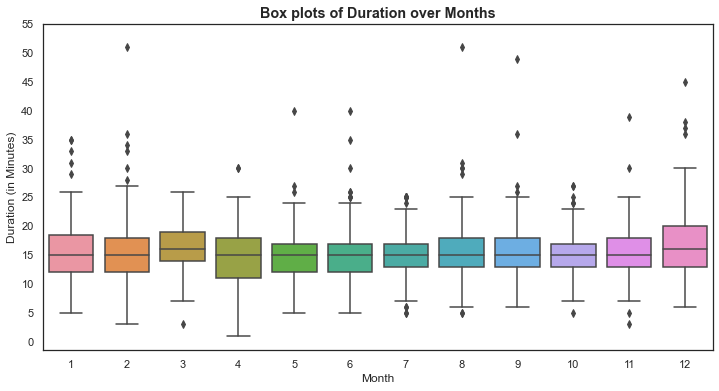

In [7]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set_style("white")
box = sns.boxplot(data=df_time,y='Duration_dt',x="Month")
box.set_yticks(list(range(0,60,5)))
box.set_title('Box plots of Duration over Months', fontdict={'fontsize':'large','fontweight':'bold'})
box.set_ylabel('Duration (in Minutes)')

Text(0, 0.5, 'Duration (in Minutes)')

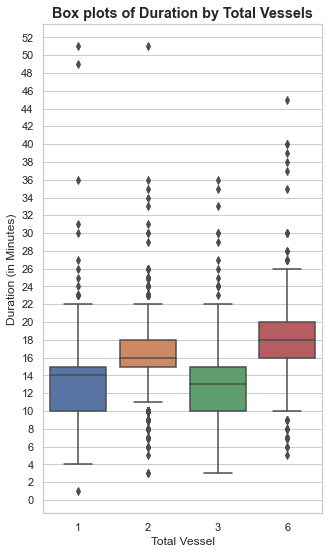

In [8]:
sns.set(rc={"figure.figsize":(5, 9)})
sns.set_style("whitegrid")
box = sns.boxplot(data=df_time[~df_time['Total Vessel'].isin([0,4])],y='Duration_dt',x="Total Vessel")
box.set_yticks(list(range(0,54,2)))
box.set_title('Box plots of Duration by Total Vessels', fontdict={'fontsize':'large','fontweight':'bold'})
box.set_ylabel('Duration (in Minutes)')

Text(0, 0.5, 'Duration (in Minutes)')

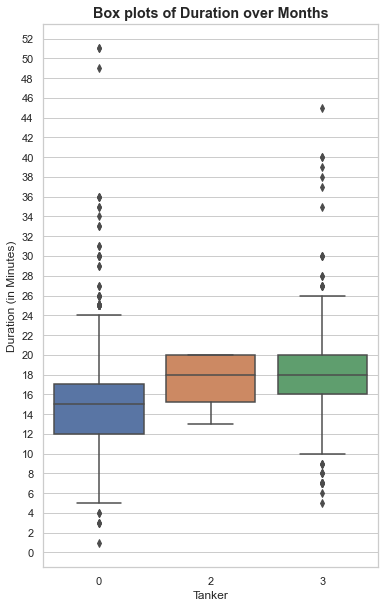

In [9]:
sns.set(rc={"figure.figsize":(6, 10)})
sns.set_style("whitegrid")
box = sns.boxplot(data=df_time,y='Duration_dt',x="Tanker")
box.set_yticks(list(range(0,54,2)))
box.set_title('Box plots of Duration over Months', fontdict={'fontsize':'large','fontweight':'bold'})
box.set_ylabel('Duration (in Minutes)')

In [10]:
df_time[df_time['Total Vessel'] == 6].query('Duration_dt <= 16')

,Unnamed: 0,Vehicle ID,Lift ID,Vessel(s),ETA Bridge,Direction,Email Sent,Advanced Notice,2 Hours Notice?,Start Time,...,Verified (ft),Tug,Barge,Tanker,Total Vessel,Day,Month,Year,Duration_datetime,Duration_dt
160,160,19050,NaN,3 TUG / TANKER,2019-06-13 06:45:00,IN,2019-06-12 20:25:00,10:20,ACCEPTABLE,2019-06-13 06:28:00,...,0.42,3,0,3,6,13,6,2019,2022-02-20 00:14:00,14.0
163,163,19050 / 51,NaN,3 TUG / BARGE & 1 TUG / BARGE,2019-06-14 07:00:00,OUT,2019-06-14 01:38:00,5:22,ACCEPTABLE,2019-06-14 06:56:00,...,2.07,3,3,0,6,14,6,2019,2022-02-20 00:06:00,6.0
194,194,19061,8.0,3 TUG / TANKER,2019-06-21 18:30:00,OUT,2019-06-21 12:43:00,5:47,ACCEPTABLE,2019-06-21 18:26:00,...,9.23,3,0,3,6,21,6,2019,2022-02-20 00:16:00,16.0
214,214,19065,28.0,3 TUG / TANKER,2019-06-26 09:45:00,OUT,2019-06-26 06:50:00,2:55,ACCEPTABLE,2019-06-26 09:57:00,...,8.29,3,0,3,6,26,6,2019,2022-02-20 00:15:00,15.0
258,258,19081,75.0,3 TUG / TANKER,2019-07-08 06:15:00,OUT,2019-07-07 13:34:00,16:41,ACCEPTABLE,2019-07-08 06:27:00,...,8.22,3,0,3,6,8,7,2019,2022-02-20 00:09:00,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,2829,20431,2836.0,3 TUGS / TANKER,2021-07-29 16:10:00,IN,2021-07-29 07:04:00,9:06,ACCEPTABLE,2021-07-29 15:42:00,...,1.61,3,0,3,6,29,7,2021,2022-02-20 00:16:00,16.0
2840,2840,20431,2847.0,3 TUGS / TANKER,2021-07-31 09:50:00,OUT,2021-07-31 05:23:00,4:27,ACCEPTABLE,2021-07-31 09:47:00,...,9.18,3,0,3,6,31,7,2021,2022-02-20 00:14:00,14.0
2849,2849,20435,2856.0,3 TUGS / TANKER,2021-08-04 11:25:00,IN,2021-08-04 06:39:00,4:46,ACCEPTABLE,2021-08-04 11:30:00,...,6.35,3,0,3,6,4,8,2021,2022-02-20 00:13:00,13.0
2864,2864,20440,2873.0,3 TUGS / TANKER,2021-08-09 09:55:00,IN,2021-08-09 05:50:00,4:05,ACCEPTABLE,2021-08-09 09:45:00,...,2.38,3,0,3,6,9,8,2021,2022-02-20 00:16:00,16.0


(0.0, 50.0)

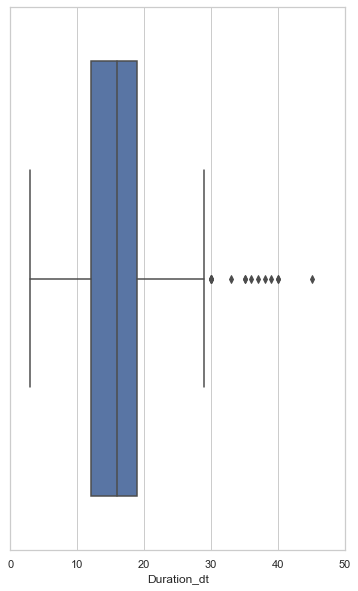

In [11]:
sns.boxplot(x=df_time[df_time['Tug']==3]['Duration_dt']).set_xlim(0,50)

(0.0, 50.0)

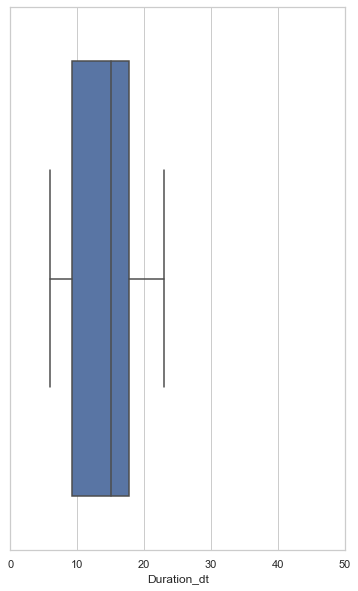

In [12]:
sns.boxplot(x=df_time[df_time['Barge']==3]['Duration_dt']).set_xlim(0,50)

(0.0, 50.0)

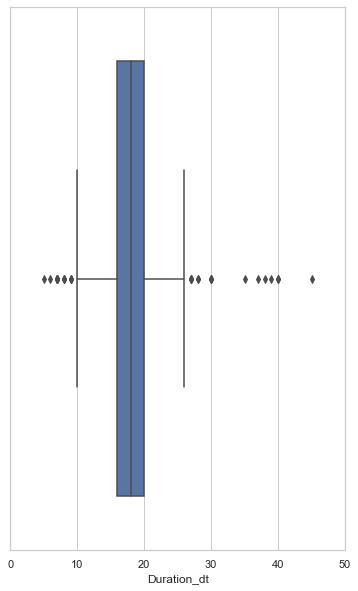

In [13]:
sns.boxplot(x=df_time[df_time['Tanker']==3]['Duration_dt']).set_xlim(0,50)

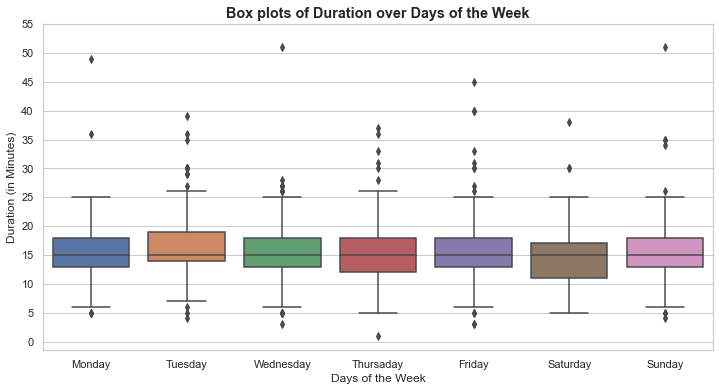

In [89]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set_style("whitegrid")
box = sns.boxplot(data=df_time,y='Duration_dt',x="DayofWeek")
box.set_yticks(list(range(0,60,5)))
box.set_title('Box plots of Duration over Days of the Week', fontdict={'fontsize':'large','fontweight':'bold'})
box.set_ylabel('Duration (in Minutes)')
box.set_xticks(ticks=list(range(0,7)),labels=['Monday','Tuesday','Wednesday','Thursaday','Friday','Saturday','Sunday'])
box.set_xlabel('Days of the Week')
plt.show()

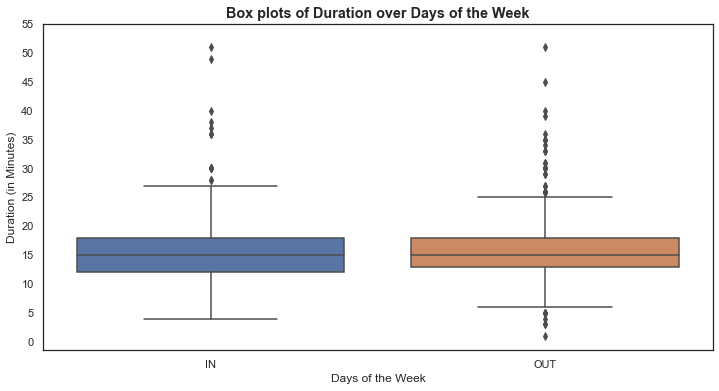

In [86]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.set_style("white")
box = sns.boxplot(data=df_time[df_time['Direction.1'].isin(['IN','OUT'])],y='Duration_dt',x="Direction.1")
box.set_yticks(list(range(0,60,5)))
box.set_title('Box plots of Duration over Days of the Week', fontdict={'fontsize':'large','fontweight':'bold'})
box.set_ylabel('Duration (in Minutes)')
#box.set_xticks(ticks=list(range(0,7)),labels=['Monday','Tuesday','Wednesday','Thursaday','Friday','Saturday','Sunday'])
box.set_xlabel('Days of the Week')
plt.show()

In [85]:
df_time['Direction.1'].unique()

array(['IN', 'OUT', 'IN / OUT', 'I N', nan, 'IN ', 'OUT ', 'TEST',
       'IN/OUT', 'OUT/IN'], dtype=object)

In [14]:
df_time.columns

Index(['Unnamed: 0', 'Vehicle  ID', 'Lift ID', 'Vessel(s)', 'ETA Bridge',
       'Direction', 'Email Sent', 'Advanced Notice', '2 Hours Notice?',
       'Start Time', 'End Time', 'Duration', 'Direction.1', 'Vessel(s).1',
       'Predict Error', 'Notice Time', 'datetime', 'temp', 'timehour',
       'Predicted (ft)', 'Verified (ft)', 'Tug', 'Barge', 'Tanker',
       'Total Vessel', 'Day', 'Month', 'Year', 'Duration_datetime',
       'Duration_dt'],
      dtype='object')

In [87]:
df_time.loc[:,['Duration_dt','Direction.1','Tug', 'Barge', 'Tanker','Total Vessel', 'Day', 'Month', 'Year','DayofWeek']]

,Duration_dt,Direction.1,Tug,Barge,Tanker,Total Vessel,Day,Month,Year,DayofWeek
Start Time,,,,,,,,,,
2019-05-06 15:12:00,18.0,IN,1,1,0,2,6,5,2019,0
2019-05-06 16:02:00,18.0,OUT,1,0,0,1,6,5,2019,0
2019-05-07 17:52:00,14.0,IN,1,0,0,1,7,5,2019,1
2019-05-07 18:25:00,13.0,OUT,1,1,0,2,7,5,2019,1
2019-05-07 18:55:00,15.0,IN,1,1,0,2,7,5,2019,1
...,...,...,...,...,...,...,...,...,...,...
2021-08-10 05:30:00,15.0,OUT,3,0,3,6,10,8,2021,1
2021-08-10 06:35:00,17.0,IN,1,1,0,2,10,8,2021,1
2021-08-10 07:19:00,21.0,OUT,1,1,0,2,10,8,2021,1
